In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
#LOADING THE DATA From data.csv
df = pd.read_csv('data.csv')
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

#Complete data set:
X = df[df.columns[2:32]]
Y = df['diagnosis']
Y = Y.values.reshape(Y.shape[0],1)


#train set (80%):
train_X = X.loc[0:454,X.columns[0:]]
train_Y = Y[0:455]

#test set (20%):
test_X = X.loc[0:143,X.columns[0:]]
test_Y = Y[0:144]


In [6]:
#training set:

mean = train_X.mean()
std_error = train_X.std()
train_X = (train_X - mean)/std_error

#test set:
mean = test_X.mean()
std_error = test_X.std()
test_X = (test_X - mean)/std_error

In [8]:
print("Shape of train_X",train_X.shape)
print("Shape of test_X",test_X.shape)
print("Shape of train_Y",train_Y.shape)
print("Shape of test_Y",test_Y.shape)

Shape of train_X (455, 30)
Shape of test_X (144, 30)
Shape of train_Y (455, 1)
Shape of test_Y (144, 1)


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
sigmoid(np.array([1,2,3,3]))

array([ 0.73105858,  0.88079708,  0.95257413,  0.95257413])

In [8]:
def random_init(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b


In [9]:
(random_init(train_X.shape[1]))

(array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), 0)

In [10]:
def propo(w,b,X,Y):
    
    m = X.shape[0]
    
    #forward propogation
    z = np.dot(X,w) + b
    a = sigmoid(z)
    cost = -np.sum(Y*np.log(a) - (1-Y)*np.log(1-a))/m
    
    
    #backpropogation:
    dz = a-Y
    dw  = np.dot(np.transpose(X),dz)/m
    db = np.sum(dz)/m
    
    grad = {
        "dw":dw,
        "db":db
    }
    return grad,cost

In [11]:
def optim(w,b,X,Y,learning_rate,num_iteration):
    costs = []
    
    for i in range(num_iteration):
        grads, cost=propo(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        #updating w and b
        w  = w - learning_rate*dw
        b  = b - learning_rate*db
          
        if(i%100==0):
            costs.append(cost)
        
    params= {
        "w":w,
        "b":b
    }
    grads = {
        "dw":dw,
        "db":db
    }
    return params,grads,costs

In [12]:
#random init of w,b
w,b = random_init(train_X.shape[1])

#forward, backward & grad. descent:

params,grads,costs = optim(w,b,train_X,train_Y,0.01,2000)

print(params)
print(grads)
print(costs)

{'b': -0.16043874120243809, 'w': array([[ 0.43834656],
       [ 0.55963099],
       [ 0.43177872],
       [ 0.42413465],
       [ 0.21983939],
       [ 0.12473863],
       [ 0.30470165],
       [ 0.43482496],
       [ 0.03752566],
       [-0.21334024],
       [ 0.41298853],
       [-0.02057517],
       [ 0.34706642],
       [ 0.37650586],
       [ 0.01480898],
       [-0.17735229],
       [-0.11835119],
       [ 0.10025685],
       [-0.14960159],
       [-0.26154789],
       [ 0.5401576 ],
       [ 0.60048724],
       [ 0.5171403 ],
       [ 0.49622086],
       [ 0.46887288],
       [ 0.23440551],
       [ 0.35239694],
       [ 0.51899847],
       [ 0.30540306],
       [ 0.14756818]])}
{'dw': array([[-0.00408704],
       [-0.01091009],
       [-0.00389218],
       [-0.00423117],
       [-0.00314432],
       [ 0.00260579],
       [-0.00371421],
       [-0.00524939],
       [ 0.00168926],
       [ 0.00423083],
       [-0.00837115],
       [ 0.00129779],
       [-0.00606264],
       [-0.0

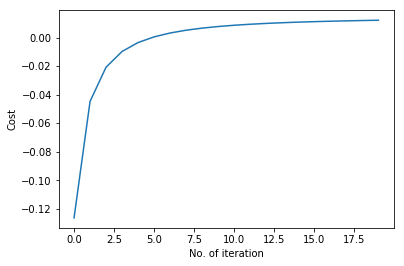

In [13]:
# plt.plot(cost_all,range(len(cost_all)))
costs = np.squeeze(costs)
plt.plot(costs)
plt.xlabel('No. of iteration')
plt.ylabel('Cost')
plt.show()

In [14]:
def predict(w,b,X):
    a = sigmoid(np.dot(X,w) + b)
    return a

In [15]:
def oneORzero(x):
    if(x>=0.5):
        return 1
    elif(x<0.5):
        return 0

In [31]:
# Accuracy for training set:
temp = predict(params["w"],params["b"],train_X)
train_prediction = np.array(list(map(oneORzero,temp)))
train_prediction = train_prediction.reshape((train_prediction.shape[0],1))

# Accuracy for test set:
temp = predict(params["w"],params["b"],test_X)
test_prediction = np.array(list(map(oneORzero,temp)))
test_prediction = test_prediction.reshape((test_prediction.shape[0],1))

print("Training set accuracy = ",(100 - np.mean(np.abs(train_prediction - train_Y))*100))
print("Test set accuracy = ",(100 - np.mean(np.abs(test_prediction - test_Y))*100))

Training set accuracy =  98.2417582418
Test set accuracy =  92.3611111111
